# NumPy応用

In [1]:
from __future__ import division
from numpy.random import randn
from pandas import Series
import numpy as np
np.set_printoptions(precision=4)
import sys

In [2]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
print(type(arr1))

<class 'numpy.ndarray'>


In [3]:
#1個飛ばしと2個飛ばしのスライス
arr1 = np.array([[1, 2, 3,4, 5, 6], [1, 2, 3,4, 5, 6]])
print(arr1[0][::2])
print(arr1[1][::3])

[1 3 5]
[1 4]


ndarryの強力な機能のひとつは、配列オブジェクトがすべてデータの塊のストライドビューであること。

ストライド（歩幅情報）を持ってるので幅を変えながらメモリ内の配列を移動できる。

## ndarray オブジェクトの内部構造

### NumPy dtype の階層構造

In [7]:
ints = np.ones(10, dtype=np.uint16)
print(ints)
floats = np.ones(10, dtype=np.float32)
print(floats)
#int16 int32の親はnp.integer。issubdtypeで型チェックできる
print(np.issubdtype(ints.dtype, np.integer))
np.issubdtype(floats.dtype, np.floating)

[1 1 1 1 1 1 1 1 1 1]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
True


True

In [5]:
#特定の型の親クラスをすべてみる。objectがルート。
np.float64.mro()

[numpy.float64,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 float,
 object]

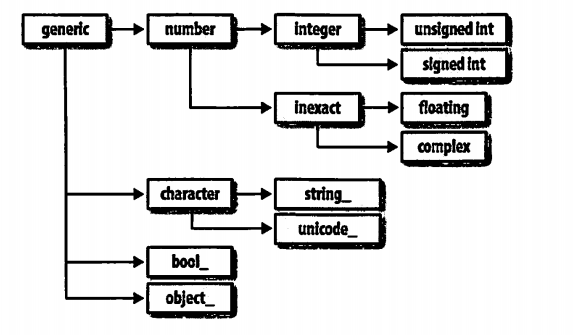

## 配列の操作：応用

### 配列の再形成

In [21]:
arr = np.arange(8)
print(arr.shape)
print(arr)
arr = arr.reshape((8, 1))
print(arr.shape)
# print(arr)
# print(arr[:,None])

arr = arr.reshape((4, 2))
print(arr.shape)

(8,)
[0 1 2 3 4 5 6 7]
(8, 1)
(4, 2)


In [22]:
arr.reshape((4, 2)).reshape((2, 4))

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [24]:
arr = np.arange(15)
arr.reshape((5, -1)) #-1は自動でやってくれてる

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [25]:
other_arr = np.ones((3, 5))
other_arr.shape
arr.reshape(other_arr.shape)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [26]:
arr = np.arange(15).reshape((5, 3))
arr
arr.ravel() #flattenとの違いは後ででてくる

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [27]:
arr.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### C と Fortran の順列の違い

In [12]:
arr = np.arange(12).reshape((3, 4))
print(arr)
print(arr.ravel())
print(arr.ravel('F'))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  4  8  1  5  9  2  6 10  3  7 11]


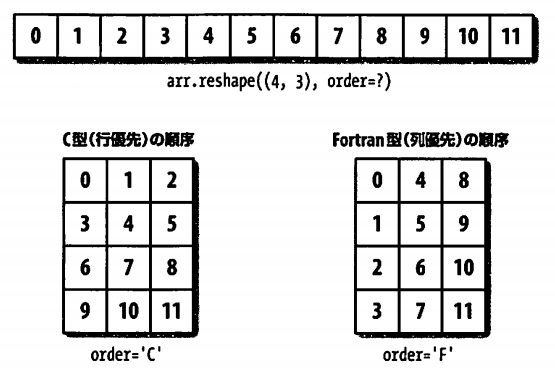

### 配列の連結と分割

In [13]:
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
arr2 = np.array([[7, 8, 9], [10, 11, 12]])
print(np.concatenate([arr1, arr2], axis=0)) #axis=0行方向
print(np.concatenate([arr1, arr2], axis=1)) #axis=1列方向

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


In [14]:
np.vstack((arr1, arr2))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [15]:
np.hstack((arr1, arr2))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [37]:
from numpy.random import randn
arr = randn(5, 2)
print(arr)
print(arr.shape)
first, second, third = np.split(arr, [1, 3]) #[]の中身はインデックス


print("\n", first, "\n")
print(second, "\n")
print(third)

[[-0.5591 -0.0931]
 [-1.2268 -0.1847]
 [-1.0789 -0.8157]
 [ 0.0625  1.9876]
 [-0.2908  0.7883]]
(5, 2)

 [[-0.5591 -0.0931]] 

[[-1.2268 -0.1847]
 [-1.0789 -0.8157]] 

[[ 0.0625  1.9876]
 [-0.2908  0.7883]]


#### Stacking helpers: 

In [39]:
arr = np.arange(6)
arr1 = arr.reshape((3, 2))
arr2 = randn(3, 2)
print(np.r_[arr1, arr2]) #rが行方向
print(np.c_[np.r_[arr1, arr2], arr]) #rが列方向

[[ 0.      1.    ]
 [ 2.      3.    ]
 [ 4.      5.    ]
 [ 0.5414  0.3237]
 [ 1.5931  0.4103]
 [-0.3092  1.1381]]
[[ 0.      1.      0.    ]
 [ 2.      3.      1.    ]
 [ 4.      5.      2.    ]
 [ 0.5414  0.3237  3.    ]
 [ 1.5931  0.4103  4.    ]
 [-0.3092  1.1381  5.    ]]


In [18]:
np.c_[1:6, -10:-5]

array([[  1, -10],
       [  2,  -9],
       [  3,  -8],
       [  4,  -7],
       [  5,  -6]])

### 要素の繰り返し: tile と repeat

In [41]:
arr = np.arange(3)
arr.repeat(3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [42]:
arr.repeat([2, 3, 4]) #要素ごとに回数を指定して増やす。0個目の要素を2個増やす...

array([0, 0, 1, 1, 1, 2, 2, 2, 2])

In [48]:
arr = randn(2, 2)
arr

array([[-0.3205, -0.2642],
       [-0.3524,  0.7368]])

In [49]:
arr.repeat(2, axis=0) #0.1053,  0.1276が行方向に増えてる

array([[-0.3205, -0.2642],
       [-0.3205, -0.2642],
       [-0.3524,  0.7368],
       [-0.3524,  0.7368]])

In [50]:
arr.repeat([2, 3], axis=0) #増やす数を指定

array([[-0.3205, -0.2642],
       [-0.3205, -0.2642],
       [-0.3524,  0.7368],
       [-0.3524,  0.7368],
       [-0.3524,  0.7368]])

In [51]:
arr.repeat([2, 3], axis=1) #列方向に増やす

array([[-0.3205, -0.3205, -0.2642, -0.2642, -0.2642],
       [-0.3524, -0.3524,  0.7368,  0.7368,  0.7368]])

In [52]:
arr

array([[-0.3205, -0.2642],
       [-0.3524,  0.7368]])

In [53]:
np.tile(arr, 2) #タイル状に敷き詰める。列方向にrepat axis=1とは似てるが、敷き詰め方（順番）が違う。

array([[-0.3205, -0.2642, -0.3205, -0.2642],
       [-0.3524,  0.7368, -0.3524,  0.7368]])

In [54]:
np.tile(arr, 3) #タイル状に敷き詰める

array([[-0.3205, -0.2642, -0.3205, -0.2642, -0.3205, -0.2642],
       [-0.3524,  0.7368, -0.3524,  0.7368, -0.3524,  0.7368]])

In [57]:
np.tile(arr, (2, 1))

array([[-0.3205, -0.2642],
       [-0.3524,  0.7368],
       [-0.3205, -0.2642],
       [-0.3524,  0.7368]])

In [58]:
np.tile(arr, (3, 2))

array([[-0.3205, -0.2642, -0.3205, -0.2642],
       [-0.3524,  0.7368, -0.3524,  0.7368],
       [-0.3205, -0.2642, -0.3205, -0.2642],
       [-0.3524,  0.7368, -0.3524,  0.7368],
       [-0.3205, -0.2642, -0.3205, -0.2642],
       [-0.3524,  0.7368, -0.3524,  0.7368]])

### ファンシーインデックス参照の別法: take と put

In [59]:
arr = np.arange(10) * 100
print(arr)
inds = [7, 1, 2, 6]
print(arr[inds]) #欲しいindexのみ取り出す

[  0 100 200 300 400 500 600 700 800 900]
[700 100 200 600]


In [60]:
print(arr)
print(arr.take(inds))

[  0 100 200 300 400 500 600 700 800 900]
[700 100 200 600]


In [62]:
arr.put(inds, 42) #値を入れる
print(arr)
arr.put(inds, [40, 41, 42, 43]) #うわがかれてる
print(arr)

[  0  42  42 300 400 500  42  42 800 900]
[  0  41  42 300 400 500  43  40 800 900]


In [64]:
inds = [2, 0, 2, 1]
arr = randn(2, 4)
print(arr)
print(arr.take(inds, axis=1))

[[-0.3474 -1.529  -0.7432  1.3121]
 [ 1.2151  1.3293 -0.2276  0.0096]]
[[-0.7432 -0.3474 -0.7432 -1.529 ]
 [-0.2276  1.2151 -0.2276  1.3293]]


## ブロードキャスト

形状の異なる２つの配列の間での算術演算。

In [65]:
#スカラー値でのブロードキャスト
arr = np.arange(5)
print(arr)
print(arr * 4)

[0 1 2 3 4]
[ 0  4  8 12 16]


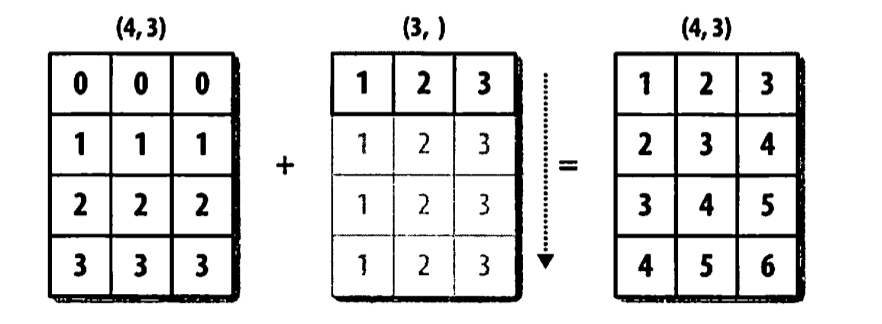

ブロードキャストできるのは両配列の最も高い次元から低い次元へ見ていった時に、次元が同じか次元が１である必要がある。

In [71]:
arr = randn(4, 3)
print(arr)
print(arr.mean(0))
print(arr.shape)
print(arr.mean(0).shape)
#各要素から平均を引く
demeaned = arr - arr.mean(0)
print(demeaned)
print(demeaned.mean(0))

[[ 0.4672  0.331   1.3048]
 [ 0.7292 -0.0807 -0.6466]
 [-0.7015 -0.3284  0.171 ]
 [ 0.6864  1.7407  0.2349]]
[ 0.2953  0.4156  0.266 ]
(4, 3)
(3,)
[[ 0.1718 -0.0846  1.0388]
 [ 0.4339 -0.4964 -0.9126]
 [-0.9968 -0.7441 -0.095 ]
 [ 0.3911  1.325  -0.0311]]
[ -2.7756e-17   0.0000e+00  -4.8572e-17]


In [85]:
arr
row_means = arr.mean(1)
row_means.reshape((4, 1))
print(arr.shape)
demeaned = arr - row_means.reshape((4, 1))
demeaned.mean(1)


(4, 3)


array([  7.4015e-17,   3.7007e-17,   0.0000e+00,   3.7007e-17])

In [87]:
a = np.array([[[1],[2],[3]], [[4],[5],[6]]])
a.shape

(2, 3, 1)

In [96]:
a

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

In [89]:
b = np.array([[1,2,3,4], [5,6,7,8],[9,10,11,12]])
b.shape

(3, 4)

In [97]:
b

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [98]:
a+b

array([[[ 2,  3,  4,  5],
        [ 7,  8,  9, 10],
        [12, 13, 14, 15]],

       [[ 5,  6,  7,  8],
        [10, 11, 12, 13],
        [15, 16, 17, 18]]])

In [99]:
(a+b).shape #(2, 3, 4)の一番大きい次元は4、(3, 4)の低いのは3。足されれ側の配列の一番高い次元から見た時の次元と、足す側の配列の次元が合ってればいい

(2, 3, 4)

In [102]:
print(a.shape)
print(b.shape)
c = np.array([[1,2,3,4,1], [5,6,7,8,1],[9,10,11,12,1],[9,10,11,12,1]])
print(c.shape)

(2, 3, 1)
(3, 4)
(4, 5)


In [101]:
a+c　#(2,3,1) (4,5) はどこも次元が合わない。

SyntaxError: invalid character in identifier (<ipython-input-101-a626ce5bb51e>, line 1)

### 他の軸へのブロードキャスト

In [50]:
arr - arr.mean(1) #規則に従わないとエラー

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

In [51]:
arr - arr.mean(1).reshape((4, 1))

array([[-1.0911,  0.8098,  0.2813],
       [ 0.233 , -0.4854,  0.2524],
       [-0.2088, -0.1098,  0.3186],
       [-1.1958, -0.2851,  1.4809]])

In [58]:
print(arr.shape)
arr_1 = np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4]])
arr_1.shape
arr - arr_1 #(4,3) (3,4) これはダメ

(4, 3)


ValueError: operands could not be broadcast together with shapes (4,3) (3,4) 

In [60]:
print(arr.shape)
arr_1 = np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4]]).reshape(4,3)
print(arr_1.shape)
arr - arr_1 #これは良い

(4, 3)
(4, 3)


array([[-2.1313, -1.2304, -2.7589],
       [-3.3122, -1.0306, -1.2927],
       [-3.892 , -4.793 , -1.3646],
       [-2.8337, -2.923 , -2.157 ]])

In [61]:
print(arr.shape)
arr_1 = np.array([[1,2,3],[1,2,3],[1,2,3]])
print(arr_1.shape)
arr - arr_1 #これはダメ

(4, 3)
(3, 3)


ValueError: operands could not be broadcast together with shapes (4,3) (3,3) 

In [64]:
print(arr.shape)
arr_1 = np.array([[1],[1],[1],[1]])
print(arr_1.shape)
arr - arr_1 #OK

(4, 3)
(4, 1)


array([[-2.1313, -0.2304, -0.7589],
       [-0.3122, -1.0306, -0.2927],
       [-1.892 , -1.793 , -1.3646],
       [-1.8337, -0.923 ,  0.843 ]])

In [65]:
print(arr.shape)
arr_1 = np.array([[1,1],[1,1],[1,1],[1,1]])
print(arr_1.shape)
arr - arr_1 #NG

(4, 3)
(4, 2)


ValueError: operands could not be broadcast together with shapes (4,3) (4,2) 

足されれ側の配列の一番高い次元から見た時の次元と、足す側の配列の次元が合ってればいい。どの方向から足すのかによってshapeが違う。

<img src=",1">


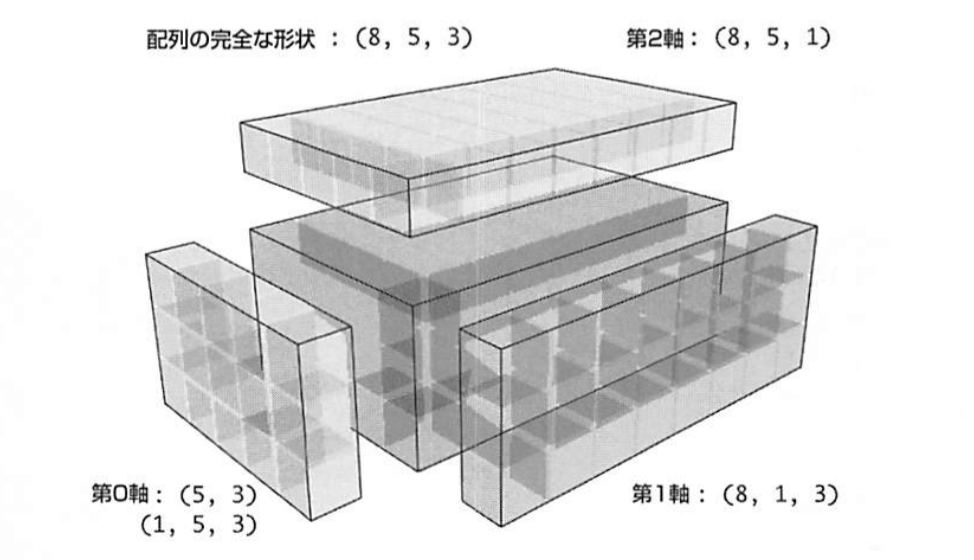

In [103]:
arr = np.zeros((4, 4))
print(arr.shape)
arr_3d = arr[:, np.newaxis, :] #newaxisで軸を追加する
print(arr_3d)
arr_3d = arr[:, None, :] #Noneでも同じ
print(arr_3d)
print(arr_3d.shape)

(4, 4)
[[[ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]]]
[[[ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]]]
(4, 1, 4)


In [67]:
arr_1d = np.random.normal(size=3) #normal:正規乱数
print(arr_1d)
print(arr_1d[:, np.newaxis])
print(arr_1d[np.newaxis, :])

[-0.2145 -0.5945  0.8621]
[[-0.2145]
 [-0.5945]
 [ 0.8621]]
[[-0.2145 -0.5945  0.8621]]


In [104]:
#
arr = randn(3, 4, 5)
depth_means = arr.mean(2)
depth_means

print(arr.shape)
print(depth_means[:, :, np.newaxis].shape)

demeaned = arr - depth_means[:, :, np.newaxis]
demeaned.mean(2)

(3, 4, 5)
(3, 4, 1)


array([[  0.0000e+00,   0.0000e+00,  -2.2204e-17,  -4.4409e-17],
       [  4.4409e-17,   0.0000e+00,   0.0000e+00,  -2.2204e-17],
       [  8.8818e-17,   1.1102e-17,  -4.4409e-17,   4.4409e-17]])

In [99]:
def demean_axis(arr, axis=0):
    means = arr.mean(axis)

    # This generalized things like [:, :, np.newaxis] to N dimensions
    indexer = [slice(None)] * arr.ndim
    indexer[axis] = np.newaxis
    return arr - means[indexer]

### ブロードキャストでの配列への値の設定

In [105]:
arr = np.zeros((4, 3))
arr[:] = 5
arr

array([[ 5.,  5.,  5.],
       [ 5.,  5.,  5.],
       [ 5.,  5.,  5.],
       [ 5.,  5.,  5.]])

In [133]:
col = np.array([1.28, -0.42, 0.44, 1.6])
print(col.shape)
print(arr.shape)
#shapeを合わせないとだめ

print(arr[:].shape)
print(arr[:])
arr[:] = col[:, np.newaxis] #値を変更
print(arr[:].shape)
print(arr[:])
arr[:2] = [[-1.37], [0.509]]
arr

(4,)
(4, 5)
(4, 5)
[[-1 -1 -1 -1 -1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 1  1  1  1  1]]
(4, 5)
[[1 1 1 1 1]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 1 1 1 1]]


array([[-1, -1, -1, -1, -1],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1]])

## ufuncの使い方：応用

### Ufunc インスタンス　メソッド

ユニバーサル関数（Ufunc）。要素間の高速な操作。ループを使わずに書ける。


In [106]:
arr = np.arange(10)
print(np.add.reduce(arr)) #reduceで集計
print(arr.sum())

45
45


In [107]:
np.random.seed(12346)

In [109]:
arr = randn(5, 5)

print(arr.shape)
print(arr[::2].shape)

print(arr)
print(arr[::2]) #前の３個

(5, 5)
(3, 5)
[[  5.2242e-01   1.0642e-01   1.0271e-01  -1.0823e-01   5.4860e-02]
 [  1.9637e-01  -1.9387e-01  -1.4566e+00   8.5745e-01  -7.4158e-01]
 [ -7.8036e-01  -1.0642e-01   5.9371e-01  -1.2835e+00   4.7796e-01]
 [  1.2924e+00   1.5165e-01  -1.4663e+00  -1.4334e+00  -9.7753e-02]
 [  1.2351e+00   1.3551e-01  -7.0550e-04   2.5360e-01  -1.8325e-01]]
[[  5.2242e-01   1.0642e-01   1.0271e-01  -1.0823e-01   5.4860e-02]
 [ -7.8036e-01  -1.0642e-01   5.9371e-01  -1.2835e+00   4.7796e-01]
 [  1.2351e+00   1.3551e-01  -7.0550e-04   2.5360e-01  -1.8325e-01]]


In [110]:
arr[::2].sort(1) # ソート！！

In [111]:
#ソートされてる
print(arr)
print(arr[::2]) 

[[ -1.0823e-01   5.4860e-02   1.0271e-01   1.0642e-01   5.2242e-01]
 [  1.9637e-01  -1.9387e-01  -1.4566e+00   8.5745e-01  -7.4158e-01]
 [ -1.2835e+00  -7.8036e-01  -1.0642e-01   4.7796e-01   5.9371e-01]
 [  1.2924e+00   1.5165e-01  -1.4663e+00  -1.4334e+00  -9.7753e-02]
 [ -1.8325e-01  -7.0550e-04   1.3551e-01   2.5360e-01   1.2351e+00]]
[[ -1.0823e-01   5.4860e-02   1.0271e-01   1.0642e-01   5.2242e-01]
 [ -1.2835e+00  -7.8036e-01  -1.0642e-01   4.7796e-01   5.9371e-01]
 [ -1.8325e-01  -7.0550e-04   1.3551e-01   2.5360e-01   1.2351e+00]]


In [113]:
arr[:, :-1]

array([[ -1.0823e-01,   5.4860e-02,   1.0271e-01,   1.0642e-01],
       [  1.9637e-01,  -1.9387e-01,  -1.4566e+00,   8.5745e-01],
       [ -1.2835e+00,  -7.8036e-01,  -1.0642e-01,   4.7796e-01],
       [  1.2924e+00,   1.5165e-01,  -1.4663e+00,  -1.4334e+00],
       [ -1.8325e-01,  -7.0550e-04,   1.3551e-01,   2.5360e-01]])

In [111]:
arr[:, 1:]

array([[ -8.9982e-02,   3.6578e-01,   7.4834e-01,   7.5937e-01],
       [ -8.6614e-01,   2.7857e-02,  -4.5560e-01,  -1.6019e+00],
       [ -5.4646e-01,  -3.2154e-01,   4.6047e-04,   2.4826e-01],
       [  1.9368e+00,  -7.9950e-01,  -5.6916e-01,   4.8924e-02],
       [ -6.4909e-01,  -4.7954e-01,   1.7540e-01,   1.4225e+00]])

In [114]:
arr[:, :-1] < arr[:, 1:]

array([[ True,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [113]:
np.logical_and.reduce(arr[:, :-1] < arr[:, 1:], axis=1) #logical_andは要素ごとの論理演算ができる。便利！
#logical_not
#logical_and
#logical_or
#logical_xor

array([ True, False,  True, False,  True], dtype=bool)

In [114]:
arr = np.arange(15).reshape((3, 5))
np.add.accumulate(arr, axis=1) #演算子をすべての要素に適用した結果を累積

array([[ 0,  1,  3,  6, 10],
       [ 5, 11, 18, 26, 35],
       [10, 21, 33, 46, 60]])

In [115]:
#hogehoge outer。要素を２つ入れてmultiply(外積)する
arr = np.arange(3).repeat([1, 2, 2])
print(arr)
print(np.multiply.outer(arr, np.arange(5)))

[0 1 1 2 2]
[[0 0 0 0 0]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 2 4 6 8]
 [0 2 4 6 8]]


In [117]:
#要素を２つ入れて減算
result = np.subtract.outer(randn(3, 4), randn(5))
print(result)
print(result.shape)


[[[ 1.2965 -2.4498 -1.9041 -0.6168 -2.1851]
  [ 1.3295 -2.4169 -1.8711 -0.5838 -2.1521]
  [ 2.6651 -1.0812 -0.5355  0.7518 -0.8165]
  [ 3.998   0.2517  0.7974  2.0847  0.5164]]

 [[ 2.8983 -0.848  -0.3022  0.9851 -0.5833]
  [ 2.7621 -0.9842 -0.4385  0.8489 -0.7195]
  [ 3.0164 -0.7299 -0.1841  1.1032 -0.4652]
  [ 2.5796 -1.1667 -0.621   0.6663 -0.902 ]]

 [[ 2.0562 -1.6901 -1.1444  0.1429 -1.4254]
  [ 3.1896 -0.5567 -0.011   1.2763 -0.292 ]
  [ 2.4853 -1.2611 -0.7153  0.572  -0.9963]
  [ 1.9345 -1.8118 -1.266   0.0213 -1.547 ]]]
(3, 4, 5)


In [118]:
arr = np.arange(10)
print(arr)
print(np.add.reduceat(arr, [0, 5, 8]))
#リダクション　　0-5を足す。5-8を足す。

[0 1 2 3 4 5 6 7 8 9]
[10 18 17]


In [119]:
arr = np.multiply.outer(np.arange(4), np.arange(5))
print(arr)
print(np.add.reduceat(arr, [0, 2, 4], axis=1))

[[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 0  2  4  6  8]
 [ 0  3  6  9 12]]
[[ 0  0  0]
 [ 1  5  4]
 [ 2 10  8]
 [ 3 15 12]]


### 独自定義の ufuncs

In [111]:
def add_elements(x, y):
    return x + y
add_them = np.frompyfunc(add_elements, 2, 1) #frompyfuncは任意のPython関数を受け取り、NumPy ufuncを返します。
add_them(np.arange(8), np.arange(8))

array([0, 2, 4, 6, 8, 10, 12, 14], dtype=object)

In [112]:
add_them = np.vectorize(add_elements, otypes=[np.float64]) #一般化された関数クラスvectorize

add_them(np.arange(8), np.arange(8))

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.])

In [113]:
arr = randn(10000)
%timeit add_them(arr, arr)
%timeit np.add(arr, arr)

100 loops, best of 3: 2.61 ms per loop
The slowest run took 5.26 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.62 µs per loop


## 構造化配列とレコード配列

In [121]:
#構造化配列(structured array)
#dtypeを自分で設定して、異なる型の変数を織り込める。
dtype = [('x', np.float64), ('y', np.int32)]
sarr = np.array([(1.5, 6), (np.pi, -2)], dtype=dtype)
sarr

array([( 1.5   ,  6), ( 3.1416, -2)],
      dtype=[('x', '<f8'), ('y', '<i4')])

In [122]:
sarr[0]
sarr[0]['y']

6

In [123]:
sarr['x']

array([ 1.5   ,  3.1416])

### ネストした dtypes と 多次元フィールド

In [124]:
dtype = [('x', np.int64, 3), ('y', np.int32)]
arr = np.zeros(4, dtype=dtype)
arr

array([([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0), ([0, 0, 0], 0)],
      dtype=[('x', '<i8', (3,)), ('y', '<i4')])

In [125]:
arr[0]['x']

array([0, 0, 0])

In [126]:
arr['x']

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [127]:
dtype = [('x', [('a', 'f8'), ('b', 'f4')]), ('y', np.int32)]
data = np.array([((1, 2), 5), ((3, 4), 6)], dtype=dtype)
data['x']
data['y']
data['x']['a']

array([ 1.,  3.])

### 構造化配列を使う理由

### 構造化配列の操作: numpy.lib.recfunctions

## ソートについて詳しく

In [128]:
arr = randn(6)
arr.sort()
arr

array([-2.7628, -0.8283, -0.7066, -0.2776,  0.4268,  0.9835])

In [129]:
arr = randn(3, 5)
arr
arr[:, 0].sort()  # Sort first column values in-place
arr

array([[-0.7893, -0.8496,  0.7188,  0.7329,  0.5047],
       [ 0.4378,  0.5392,  1.2907,  0.8676,  0.4113],
       [ 0.4459, -0.3172, -1.0493,  1.3459,  0.356 ]])

In [123]:
arr = randn(5)
arr
np.sort(arr)
arr

array([-1.1181, -0.2415, -2.0051,  0.7379, -1.0614])

In [124]:
arr = randn(3, 5)
arr
arr.sort(axis=1)
arr

array([[-0.2682, -0.1872,  0.5955,  0.9111,  1.3389],
       [-0.5168, -0.3215, -0.1989,  1.0054,  1.1925],
       [-1.7638, -0.2222, -0.2171,  0.3969,  0.6071]])

In [125]:
arr[:, ::-1] #?宿題

array([[ 1.3389,  0.9111,  0.5955, -0.1872, -0.2682],
       [ 1.1925,  1.0054, -0.1989, -0.3215, -0.5168],
       [ 0.6071,  0.3969, -0.2171, -0.2222, -1.7638]])

### 間接ソート: argsort と lexsort

In [131]:
values = np.array([5, 0, 1, 3, 2])
indexer = values.argsort() #ソートした場合のindex番号の配列を取得
indexer
values[indexer]

array([0, 1, 2, 3, 5])

In [132]:
arr = randn(3, 5)
arr[0] = values
arr
arr[:, arr[0].argsort()] #?宿題

array([[ 0.    ,  1.    ,  2.    ,  3.    ,  5.    ],
       [-0.8812, -0.1903,  0.2149, -1.1259, -1.4077],
       [ 0.5518, -0.6637,  1.2391,  0.3926,  1.0566]])

In [137]:
first_name = np.array(['Bob', 'Jane', 'Steve', 'Bill', 'Barbara'])
last_name = np.array(['Jones', 'Arnold', 'Arnold', 'Jones', 'Walters'])
sorter = np.lexsort((first_name, last_name)) #複数のキーで間接ソート
zip(last_name[sorter], first_name[sorter])

### 他のソートアルゴリズム

In [129]:
values = np.array(['2:first', '2:second', '1:first', '1:second', '1:third'])
key = np.array([2, 2, 1, 1, 1])
indexer = key.argsort(kind='mergesort')
indexer
values.take(indexer) #

array(['1:first', '1:second', '1:third', '2:first', '2:second'],
      dtype='|S8')

### numpy.searchsorted: ソートされた配列内で要素を探す

In [142]:
arr = np.array([0, 1, 7, 12, 15])
arr.searchsorted(9) #ソートされた配列内で二分探索をし、挿入される位置を返す

3

In [143]:
arr.searchsorted([0, 8, 11, 16])

array([0, 3, 3, 5])

In [144]:
arr = np.array([0, 0, 0, 1, 1, 1, 1])
arr.searchsorted([0, 1])
arr.searchsorted([0, 1], side='right')

array([3, 7])

In [145]:
#binsにdataを当てはめるのにsearchsortedを使うと便利
data = np.floor(np.random.uniform(0, 10000, size=50))
bins = np.array([0, 100, 1000, 5000, 10000])
print(bins)
print(data)

#四捨五入 np.round()
#切り捨て np.trunc()
#切り捨て np.floor()
#切り上げ np.ceil()
#ゼロに近いほうに丸める np.fix()

[    0   100  1000  5000 10000]
[ 2738.  1999.  2340.  8160.  1993.  6170.  4571.  4352.   911.  5201.
  8398.  8412.  3234.  4467.  3305.  3748.  3378.  6950.  6696.  7077.
   403.  8667.  3135.  3246.  4590.  1452.  2021.  5893.  8678.   962.
   723.  4741.  2166.  2112.  6317.  4922.  9652.  1591.  7388.  8921.
  6291.  2101.  9478.  6596.  2582.  9456.  7165.   333.  7476.   659.]


In [148]:
labels = bins.searchsorted(data)
labels #どこのindexに入ったか

array([3, 3, 3, 4, 3, 4, 3, 3, 2, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 2, 4, 3,
       3, 3, 3, 3, 4, 4, 2, 2, 3, 3, 3, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 3, 4,
       4, 2, 4, 2])

In [149]:
Series(data).groupby(labels).mean()

2     665.166667
3    3077.565217
4    7573.428571
dtype: float64

In [150]:
np.digitize(data, bins) #データに対応したビンの位置情報が格納されたリストを取得

array([3, 3, 3, 4, 3, 4, 3, 3, 2, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 2, 4, 3,
       3, 3, 3, 3, 4, 4, 2, 2, 3, 3, 3, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 3, 4,
       4, 2, 4, 2])

## NumPy の行列クラス

In [137]:
X =  np.array([[ 8.82768214,  3.82222409, -1.14276475,  2.04411587],
               [ 3.82222409,  6.75272284,  0.83909108,  2.08293758],
               [-1.14276475,  0.83909108,  5.01690521,  0.79573241],
               [ 2.04411587,  2.08293758,  0.79573241,  6.24095859]])
X[:, 0]  # one-dimensional
y = X[:, :1]  # two-dimensional by slicing
X
y

array([[ 8.8277],
       [ 3.8222],
       [-1.1428],
       [ 2.0441]])

In [138]:
np.dot(y.T, np.dot(X, y))

array([[ 1195.468]])

In [139]:
Xm = np.matrix(X)
ym = Xm[:, 0]
Xm
ym
ym.T * Xm * ym

matrix([[ 1195.468]])

In [140]:
Xm.I * X

matrix([[  1.0000e+00,  -1.3878e-16,  -5.8981e-17,   2.7756e-17],
        [  1.5266e-16,   1.0000e+00,   6.2450e-17,   2.7756e-17],
        [  1.1102e-16,   1.3878e-17,   1.0000e+00,   0.0000e+00],
        [  5.5511e-17,   1.1102e-16,   0.0000e+00,   1.0000e+00]])

## 配列の入出力：応用

### メモリマップファイル

In [141]:
#1TBなどメモリに乗り切らないデータを扱う時に使用

mmap = np.memmap('mymmap', dtype='float64', mode='w+', shape=(10000, 10000))
mmap

memmap([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [142]:
section = mmap[:5]

In [143]:
section[:] = np.random.randn(5, 10000)
mmap.flush()
mmap
del mmap

In [144]:
mmap = np.memmap('mymmap', dtype='float64', shape=(10000, 10000))
mmap

memmap([[-0.1614, -0.1768,  0.422 , ..., -0.2195, -0.1256, -0.4012],
        [ 0.4898, -2.2219, -0.7684, ..., -2.3517, -1.0782,  1.3208],
        [-0.6875,  1.6901, -0.7444, ..., -1.4218, -0.0509,  1.2224],
        ..., 
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ]])

In [145]:
%xdel mmap
!rm mymmap

### HDF5 and other array storage options

## パフォーマンスの小技

### 連続したメモリの重要さ

In [146]:
#fortranは列優先、Cは行優先。デフォルトはC。各行の足し算はCの方が早い。場合によって変更してね。
arr_c = np.ones((1000, 1000), order='C')
arr_f = np.ones((1000, 1000), order='F')
arr_c.flags
arr_f.flags
arr_f.flags.f_contiguous

True

In [147]:
%timeit arr_c.sum(1)
%timeit arr_f.sum(1)

1000 loops, best of 3: 654 µs per loop
1000 loops, best of 3: 736 µs per loop


In [148]:
arr_f.copy('C').flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [149]:
arr_c[:50].flags.contiguous
arr_c[:, :50].flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [150]:
%xdel arr_c
%xdel arr_f
%cd ..

/Users/user/projects


## 高速化の選択肢: Cython, f2py, C

```cython
from numpy cimport ndarray, float64_t

def sum_elements(ndarray[float64_t] arr):
    cdef Py_ssize_t i, n = len(arr)
    cdef float64_t result = 0

    for i in range(n):
        result += arr[i]

    return result
```